# Cassava Leaf Disease Classification EDA

## Import and Load data


In [ ]:
import time
import pickle
import numpy as np
import pandas as pd
import os
import json
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
from PIL import Image, ImageStat
from skimage import io, color

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the training data
train_raw = pd.read_csv('train.csv', encoding='utf_8_sig', engine='python')
train_raw.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


## Single Image analysis

The size of the picture is (800, 600).


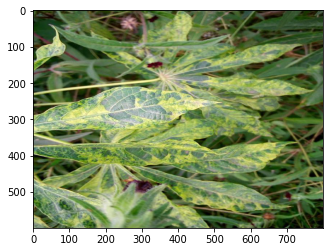

In [ ]:
# Take a look at the given leaf picture
pic = Image.open('train_images/1411386.jpg')
plt.imshow(pic)
print('The size of the picture is {}.'.format(pic.size))

In [ ]:
# Get basic image stats
img = io.imread('train_images/1411386.jpg')
img_shape = img.shape  # observe that each picture has R/G/B - 3 channels, each channel has a size of (800, 600)
img_grey = color.rgb2gray(img)  # Converting to grey scale according to formula: Y = 0.2125 R + 0.7154 G + 0.0721 B

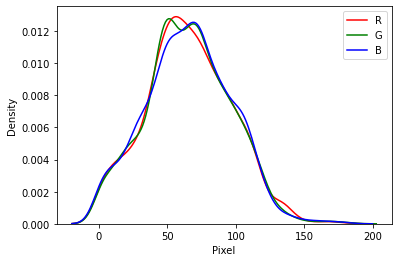

In [ ]:
# Density of R, G and B channel
sns.kdeplot(img[0].flatten(), color='red', label='R')
sns.kdeplot(img[1].flatten(), color='green', label='G')
sns.kdeplot(img[2].flatten(), color='blue', label='B')
plt.xlabel('Pixel')
plt.ylabel('Density')
plt.legend()
plt.show()

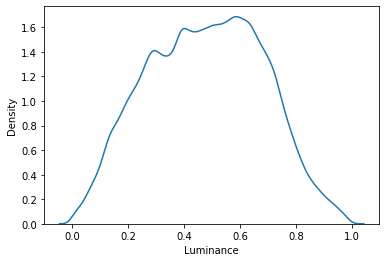

In [ ]:
# Investigating the density plot of grey-scaled picture
sns.kdeplot(img_grey.flatten())
plt.xlabel('Luminance')
plt.ylabel('Density')
plt.show()

## Classes analysis

In [ ]:
# Loading the label mapping file
with open('label_num_to_disease_map.json', 'rb') as f:
    label_map = json.load(f)
    print(label_map)

{'0': 'Cassava Bacterial Blight (CBB)', '1': 'Cassava Brown Streak Disease (CBSD)', '2': 'Cassava Green Mottle (CGM)', '3': 'Cassava Mosaic Disease (CMD)', '4': 'Healthy'}


In [ ]:
# Merging label mapping with training data
train_raw['disease_name'] = train_raw['label'].apply(lambda x: label_map.get(str(x), None))

In [ ]:
def get_basic_stat(file_names):
    luminance = []
    median = []
    contrast = []
    size_width = []
    size_length = []
    kurt = []
    for fn in file_names:
        try:
            p = Image.open('train_images/'+fn)
            img = io.imread('train_images/' + fn)
        except FileNotFoundError:
            print('Training sample not found {}.'.format(fn))
            luminance.append(None)
            median.append(None)
            contrast.append(None)
            size_width.append(None)
            size_length.append(None)
            kurt.append(None)
            continue

        pl = p.convert('L')
        p_stats = ImageStat.Stat(pl)
        luminance.append(p_stats._getrms()[0])
        median.append(p_stats._getmedian()[0])
        contrast.append(p_stats._getstddev()[0])
        size_width.append(p.size[1])
        size_length.append(p.size[0])

        kurt.append(stats.kurtosis(color.rgb2gray(img).flatten(), fisher=False))
    return luminance, median, contrast, size_length, size_width, kurt

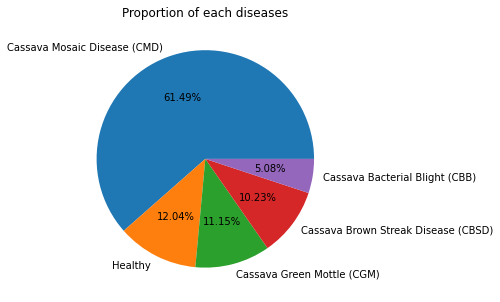

In [ ]:
# Investigating the distribution of data:
# Pie plot
plt.figure(figsize=(10, 5))
disease_proportions = train_raw['disease_name'].value_counts()
disease_names = disease_proportions.index.tolist()
disease_proportions = disease_proportions.values.tolist()
plt.pie(disease_proportions, labels=disease_names, autopct='%1.2f%%')
plt.title('Proportion of each diseases')
plt.show()

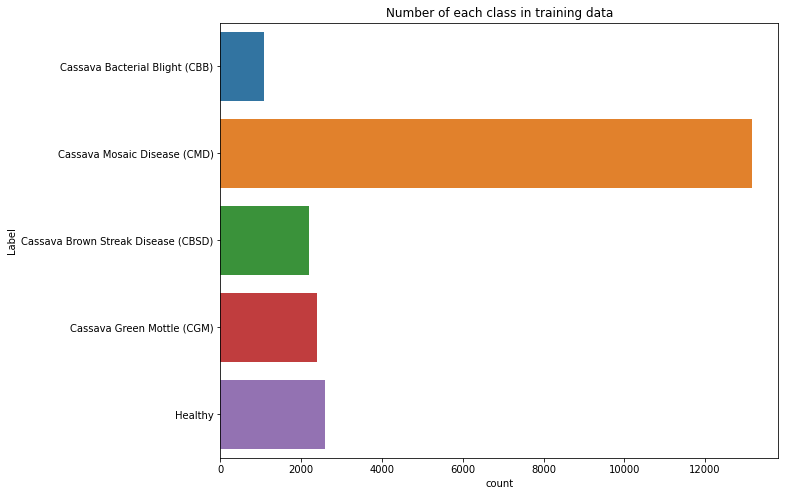

In [ ]:
# Bar Plot
plt.figure(figsize=(10, 8))
sns.countplot(data=train_raw, y='disease_name')
plt.title('Number of each class in training data')
plt.ylabel('Label')
plt.show()